In [ ]:
# Examén Primer Parcial
# Andrea Mercado Jiménez 
# 3 marzo 2025

## 1. Reproducir el análisis de PCA aplicado al Iris dataset, utilizando 3 componentes

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from pandas.api.types import CategoricalDtype

In [10]:
file_path = r"C:\Users\andim\OneDrive\Escritorio\Neurociencias-2025-2\S03_datasets\iris\iris.csv"
iris_df = pd.read_csv(file_path)

print(iris_df.head())

X = iris_df.iloc[:, :-1].values
labels = iris_df.iloc[:, -1].values 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### A. Indicar el porcentaje de la información utilizando los 3 componentes principales

In [11]:
explained_variance = pca.explained_variance_ratio_
total_variance = np.sum(explained_variance)
print(f"Varianza explicada por los 3 componentes: {explained_variance}")
print(f"Varianza total explicada: {total_variance * 100:.2f}%")

Varianza explicada por los 3 componentes: [0.72962445 0.22850762 0.03668922]
Varianza total explicada: 99.48%



### B. Hacer el scatter 3D de los datos proyectados, con cualquiera de los 3 métodos

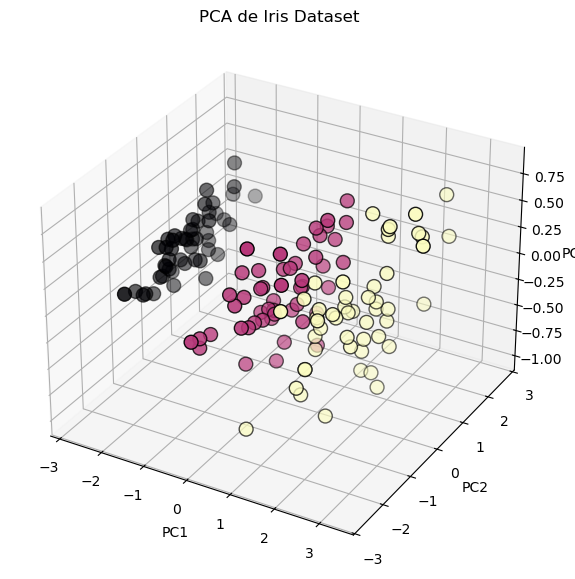

In [12]:
labels_cat = pd.Series(labels).astype(CategoricalDtype()).cat.codes


fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_cat, cmap='magma', edgecolor='k', s=100)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA de Iris Dataset")
plt.show()

## 2. Realizar el análisis de PCA utilizando el dataset Brain_tumor, archivo Brain tumor.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
file_path = r'C:\Users\andim\OneDrive\Escritorio\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv'
brain_df = pd.read_csv(file_path)

print(brain_df.head())

brain_df = brain_df.select_dtypes(include=[np.number])

X = brain_df.drop(columns=['Class'], errors='ignore').values
labels = brain_df['Class'].values if 'Class' in brain_df.columns else None

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

    Image  Class      Mean     Variance  Standard Deviation   Entropy  \
0  Image1      0  6.535339   619.587845           24.891522  0.109059   
1  Image2      0  8.749969   805.957634           28.389393  0.266538   
2  Image3      1  7.341095  1143.808219           33.820234  0.001467   
3  Image4      1  5.958145   959.711985           30.979219  0.001477   
4  Image5      0  7.315231   729.540579           27.010009  0.146761   

   Skewness   Kurtosis    Contrast    Energy       ASM  Homogeneity  \
0  4.276477  18.900575   98.613971  0.293314  0.086033     0.530941   
1  3.718116  14.464618   63.858816  0.475051  0.225674     0.651352   
2  5.061750  26.479563   81.867206  0.031917  0.001019     0.268275   
3  5.677977  33.428845  151.229741  0.032024  0.001026     0.243851   
4  4.283221  19.079108  174.988756  0.343849  0.118232     0.501140   

   Dissimilarity  Correlation     Coarseness  
0       4.473346     0.981939  7.458341e-155  
1       3.220072     0.988834  7.458341e

### A. ¿Qué notan de extraño con la columna "Coarseness" al normalizar el dataset?

In [4]:
print("Columnas en el dataset original:", brain_df.columns)
if 'Coarseness' in brain_df.columns:
    coarseness_index = brain_df.columns.get_loc("Coarseness")
    if coarseness_index < X_scaled.shape[1]:
        print("Estadísticas de la columna 'Coarseness' después de normalizar:")
        print(pd.Series(X_scaled[:, coarseness_index]).describe())
    else:
        print("Error: El índice de 'Coarseness' está fuera del rango de X_scaled.")
else:
    print("Advertencia: 'Coarseness' no está presente en el dataset.")

Columnas en el dataset original: Index(['Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')
Error: El índice de 'Coarseness' está fuera del rango de X_scaled.


### B. Determinar el porcentaje de aporte de cada vector propio

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Porcentaje de varianza explicada por cada componente:")
print(explained_variance)

Porcentaje de varianza explicada por cada componente:
[ 4.08816773e-01  3.12991477e-01  1.28742637e-01  6.26484623e-02
  4.78447253e-02  2.00054187e-02  1.07659606e-02  3.34276945e-03
  2.55305629e-03  1.39156675e-03  8.91780975e-04  5.37250098e-06
 -0.00000000e+00]


### C. Determinar cuántos componentes principales son necesarios para obtener al menos un 90% de datos

In [6]:
cumulative_variance = np.cumsum(explained_variance)
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Número de componentes para explicar al menos el 90% de la varianza: {n_components_90}")

Número de componentes para explicar al menos el 90% de la varianza: 4


### D. Realizar la proyección de la data original al espacio reducido mediante 2 métodos y comparar resultados

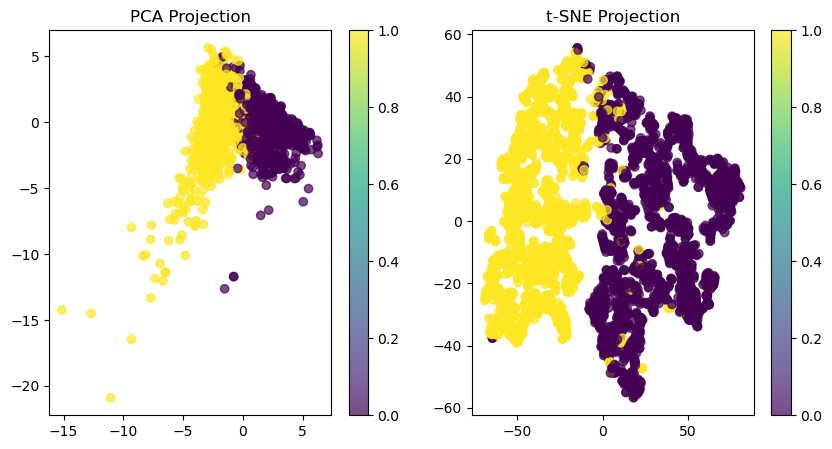

Varianza explicada por PCA: [0.40881677 0.31299148]
Dispersión media en t-SNE: 43.488964


In [40]:
# Método 1: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Método 2: t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# PCA
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
axes[0].set_title('PCA Projection')
fig.colorbar(scatter1, ax=axes[0])

# t-SNE
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.7)
axes[1].set_title('t-SNE Projection')
fig.colorbar(scatter2, ax=axes[1])

plt.show()

# Comparación de varianza explicada por PCA
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por PCA:", explained_variance)

# Comparación de dispersión en t-SNE
mean_distance_tsne = np.mean(np.linalg.norm(X_tsne - np.mean(X_tsne, axis=0), axis=1))
print("Dispersión media en t-SNE:", mean_distance_tsne)

### E. Hacer la comparación de los pairplot con la data original y la data proyectada "Nota: En el dataset Iris, la variable "Species" era descartada; en el dataset Brain_tumor, descartar la variable "Class"

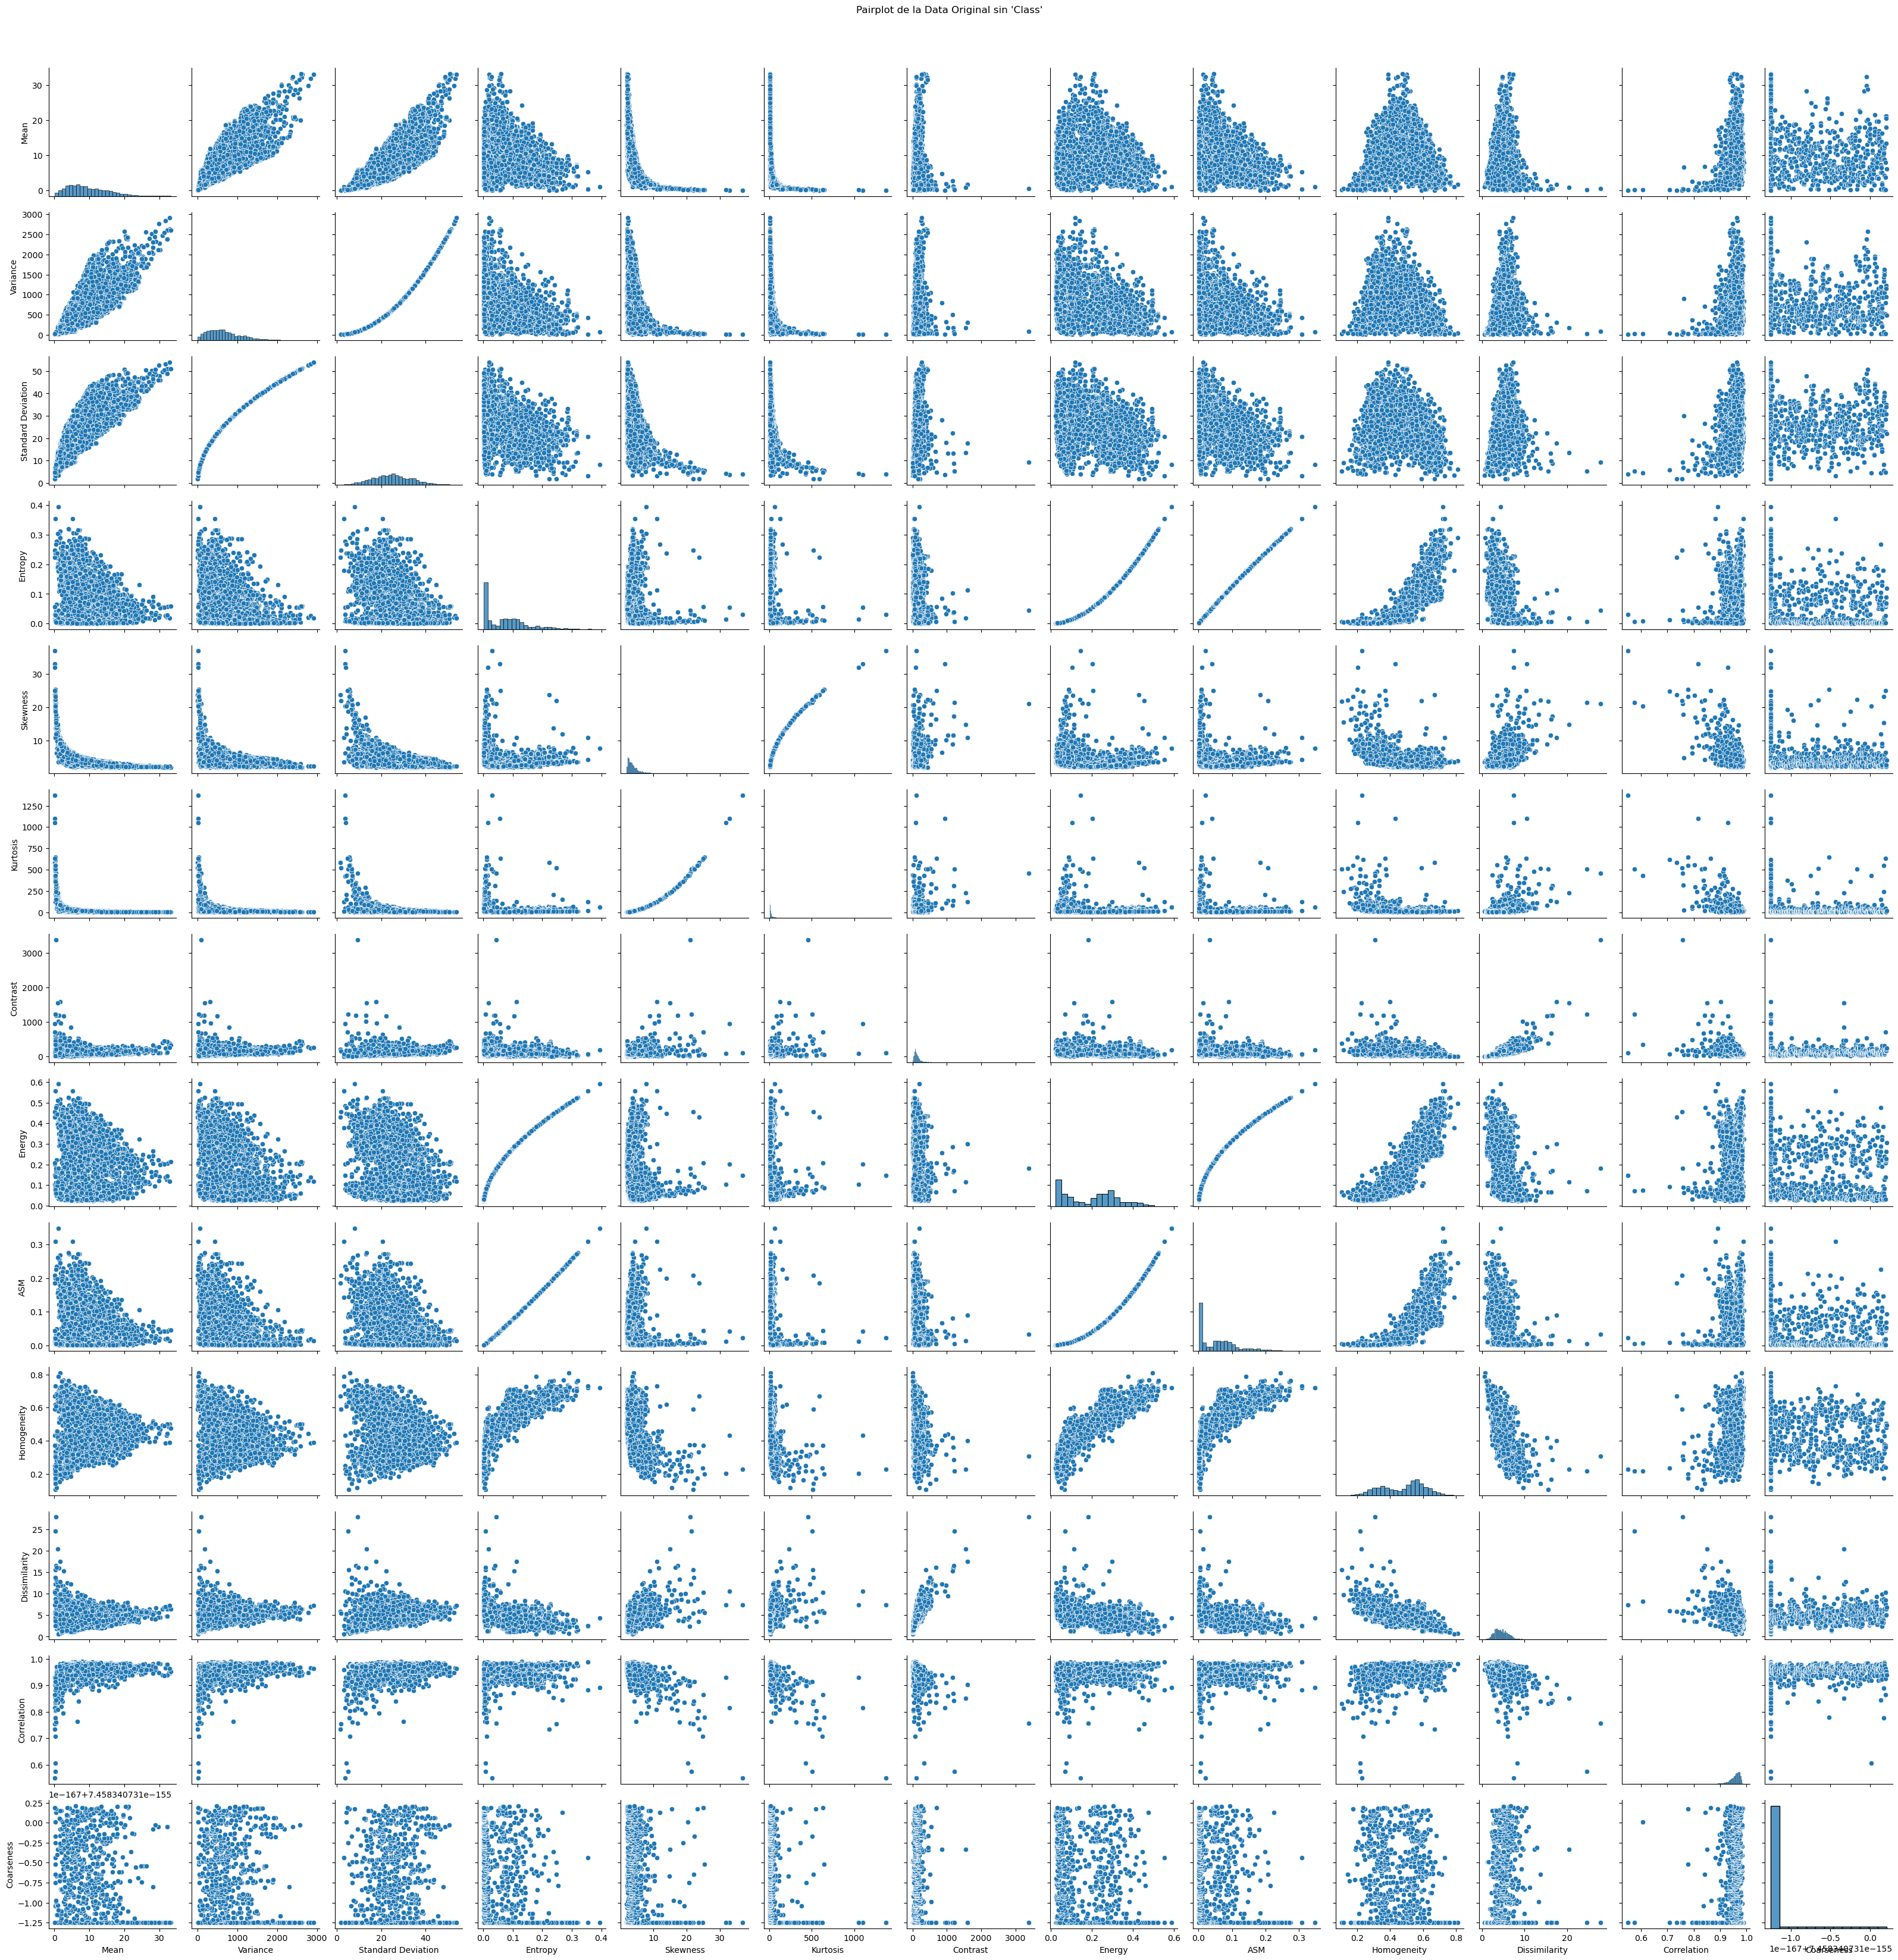

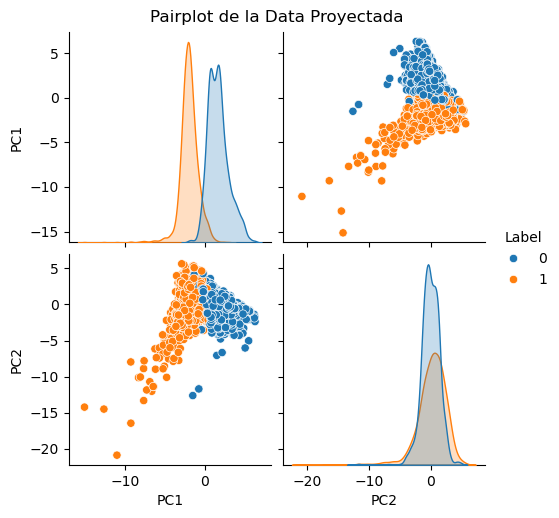

In [8]:
df_filtered = brain_df.drop(columns=['Class'])
sns.pairplot(df_filtered)
plt.suptitle("Pairplot de la Data Original sin 'Class'", y=1.02)
plt.show()

df_pca = pd.DataFrame(X_pca_2, columns=["PC1", "PC2"])
df_pca["Label"] = labels
sns.pairplot(df_pca, hue="Label", diag_kind="kde")
plt.suptitle("Pairplot de la Data Proyectada", y=1.02)
plt.show()